# EXPERIMENT 9: NEURAL NETWORK AND BACKPROPAGATION FROM SCRATCH

In [9]:
# Install necessary libraries
!pip install numpy pandas scikit-learn matplotlib seaborn -q

# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)
import warnings
warnings.filterwarnings('ignore')

print("=" * 90)
print("EXPERIMENT 9: IMPLEMENTING A NEURAL NETWORK AND BACKPROPAGATION FROM SCRATCH")
print("=" * 90)

EXPERIMENT 9: IMPLEMENTING A NEURAL NETWORK AND BACKPROPAGATION FROM SCRATCH


# TASK 1: DATA LOADING AND PREPROCESSING

In [10]:
print("\n" + "=" * 90)
print("TASK 1: DATA LOADING AND PREPROCESSING (15 Marks)")
print("=" * 90)

# Load Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target

print(f"\n✓ Dataset Loaded:")
print(f"  - Shape of X: {X.shape}")
print(f"  - Shape of y: {y.shape}")
print(f"  - Number of features: {X.shape[1]}")
print(f"  - Number of classes: {len(np.unique(y))}")
print(f"  - Class distribution: {np.bincount(y)}")
print(f"\n✓ Feature names (first 5): {data.feature_names[:5]}")

# Create 70/30 train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\n✓ Train-Validation Split (70/30):")
print(f"  - Training set size: {X_train.shape[0]}")
print(f"  - Validation set size: {X_val.shape[0]}")

# Standardize features (critical for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print(f"\n✓ Feature Standardization:")
print(f"  - Scaler fitted on training set")
print(f"  - Training set mean (first 5 features): {X_train_scaled.mean(axis=0)[:5]}")
print(f"  - Training set std (first 5 features): {X_train_scaled.std(axis=0)[:5]}")


TASK 1: DATA LOADING AND PREPROCESSING (15 Marks)

✓ Dataset Loaded:
  - Shape of X: (569, 30)
  - Shape of y: (569,)
  - Number of features: 30
  - Number of classes: 2
  - Class distribution: [212 357]

✓ Feature names (first 5): ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']

✓ Train-Validation Split (70/30):
  - Training set size: 398
  - Validation set size: 171

✓ Feature Standardization:
  - Scaler fitted on training set
  - Training set mean (first 5 features): [-1.20869255e-15 -3.93292322e-15 -3.50361839e-15  2.23160407e-16
 -2.97863353e-15]
  - Training set std (first 5 features): [1. 1. 1. 1. 1.]



# TASK 2: 'FROM SCRATCH' UTILITIES (NumPy)

In [11]:
print("\n" + "=" * 90)
print("TASK 2: 'FROM SCRATCH' UTILITIES (20 Marks)")
print("=" * 90)

# Activation Functions
def sigmoid(Z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-np.clip(Z, -500, 500)))  # Clip for numerical stability

def relu(Z):
    """ReLU activation function"""
    return np.maximum(0, Z)

# Activation Derivatives
def sigmoid_derivative(A):
    """Derivative of sigmoid activation"""
    return A * (1 - A)

def relu_derivative(Z):
    """Derivative of ReLU activation"""
    return (Z > 0).astype(float)

# Loss Functions
def compute_bce_loss(Y, Y_hat):
    """Binary Cross-Entropy loss"""
    epsilon = 1e-15  # Small value to avoid log(0)
    Y_hat = np.clip(Y_hat, epsilon, 1 - epsilon)
    loss = -np.mean(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))
    return loss

def compute_mse_loss(Y, Y_hat):
    """Mean Squared Error loss"""
    loss = np.mean((Y - Y_hat) ** 2)
    return loss

print("\n✓ Activation Functions Implemented:")
print("  - sigmoid(Z)")
print("  - relu(Z)")
print("  - sigmoid_derivative(A)")
print("  - relu_derivative(Z)")

print("\n✓ Loss Functions Implemented:")
print("  - compute_bce_loss(Y, Y_hat)")
print("  - compute_mse_loss(Y, Y_hat)")


TASK 2: 'FROM SCRATCH' UTILITIES (20 Marks)

✓ Activation Functions Implemented:
  - sigmoid(Z)
  - relu(Z)
  - sigmoid_derivative(A)
  - relu_derivative(Z)

✓ Loss Functions Implemented:
  - compute_bce_loss(Y, Y_hat)
  - compute_mse_loss(Y, Y_hat)



# TASK 3: 'FROM SCRATCH' ANN CLASSIFIER

In [12]:


print("\n" + "=" * 90)
print("TASK 3: 'FROM SCRATCH' ANN CLASSIFIER (40 Marks)")
print("=" * 90)

class MyANNClassifier:
    """
    Custom Neural Network Classifier built from scratch using NumPy.
    Implements Forward Propagation, Backpropagation, and Gradient Descent.
    """

    def __init__(self, layer_dims, learning_rate=0.01, n_iterations=1000, loss='bce'):
        """
        Initialize the Neural Network.

        Parameters:
        -----------
        layer_dims : list
            List of integers specifying number of units in each layer.
            Example: [30, 10, 5, 1] means input layer (30), hidden layers (10, 5), output layer (1)

        learning_rate : float
            Learning rate for gradient descent optimization

        n_iterations : int
            Number of training iterations

        loss : str
            Loss function to use ('bce' or 'mse')
        """
        self.layer_dims = layer_dims
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.loss = loss
        self.parameters_ = {}
        self.costs_ = []
        self.cache = []

        print(f"✓ MyANNClassifier Initialized:")
        print(f"  - Layer dimensions: {layer_dims}")
        print(f"  - Learning rate: {learning_rate}")
        print(f"  - Iterations: {n_iterations}")
        print(f"  - Loss function: {loss}")

    def _initialize_parameters(self, seed=42):
        """
        Initialize weights and biases for all layers.

        Parameters:
        -----------
        seed : int
            Random seed for reproducibility
        """
        np.random.seed(seed)

        for i in range(1, len(self.layer_dims)):
            # He initialization for weights (good for ReLU networks)
            W = np.random.randn(self.layer_dims[i], self.layer_dims[i-1]) * 0.01
            b = np.zeros((self.layer_dims[i], 1))

            self.parameters_[f'W{i}'] = W
            self.parameters_[f'b{i}'] = b

        print(f"\n✓ Parameters Initialized:")
        for key in sorted(self.parameters_.keys()):
            shape = self.parameters_[key].shape
            print(f"  - {key}: {shape}")

    def _forward_propagation(self, X):
        """
        Perform forward propagation through the network.

        Parameters:
        -----------
        X : ndarray
            Input features of shape (n_features, n_samples)

        Returns:
        --------
        A_L : ndarray
            Output predictions (probabilities for output layer)

        cache : list
            Stored activations and linear outputs for backpropagation
        """
        self.cache = []
        A = X

        # Forward pass through each layer
        for i in range(1, len(self.layer_dims)):
            A_prev = A
            W = self.parameters_[f'W{i}']
            b = self.parameters_[f'b{i}']

            # Linear computation
            Z = np.dot(W, A_prev) + b

            # Activation function
            if i == len(self.layer_dims) - 1:
                # Output layer: use sigmoid
                A = sigmoid(Z)
            else:
                # Hidden layers: use ReLU
                A = relu(Z)

            # Store for backpropagation
            self.cache.append((A_prev, Z, A, W, b))

        return A, self.cache

    def _backward_propagation(self, Y, Y_hat):
        """
        Perform backward propagation to calculate gradients.

        Parameters:
        -----------
        Y : ndarray
            True labels of shape (1, n_samples)

        Y_hat : ndarray
            Predicted outputs from forward pass

        Returns:
        --------
        grads : dict
            Dictionary containing gradients for all parameters
        """
        grads = {}
        m = Y.shape[1]  # Number of samples

        # Initialize gradient of loss w.r.t. output
        if self.loss == 'bce':
            dA = -(np.divide(Y, Y_hat + 1e-15) - np.divide(1 - Y, 1 - Y_hat + 1e-15))
        else:  # MSE loss
            dA = 2 * (Y_hat - Y)

        # Backpropagate through layers
        for i in reversed(range(len(self.layer_dims) - 1)):
            A_prev, Z, A, W, b = self.cache[i]

            # Gradient of loss w.r.t. linear output (Z)
            if i == len(self.layer_dims) - 2:
                # Output layer: use sigmoid derivative
                dZ = dA * sigmoid_derivative(A)
            else:
                # Hidden layers: use ReLU derivative
                dZ = dA * relu_derivative(Z)

            # Gradients w.r.t. parameters
            dW = np.dot(dZ, A_prev.T) / m
            db = np.sum(dZ, axis=1, keepdims=True) / m

            # Gradient w.r.t. previous activation
            dA = np.dot(W.T, dZ)

            # Store gradients
            grads[f'dW{i+1}'] = dW
            grads[f'db{i+1}'] = db

        return grads

    def _update_parameters(self, grads):
        """
        Update weights and biases using gradient descent.

        Parameters:
        -----------
        grads : dict
            Dictionary containing gradients for all parameters
        """
        for i in range(1, len(self.layer_dims)):
            self.parameters_[f'W{i}'] -= self.learning_rate * grads[f'dW{i}']
            self.parameters_[f'b{i}'] -= self.learning_rate * grads[f'db{i}']

    def fit(self, X, y):
        """
        Train the neural network.

        Parameters:
        -----------
        X : ndarray
            Training features of shape (n_samples, n_features)

        y : ndarray
            Training labels of shape (n_samples,)
        """
        # Reshape inputs to (n_features, n_samples)
        X = X.T  # (n_features, n_samples)
        y = y.reshape(1, -1)  # (1, n_samples)

        # Initialize parameters
        self._initialize_parameters()

        # Training loop
        for iteration in range(self.n_iterations):
            # Forward propagation
            Y_hat, _ = self._forward_propagation(X)

            # Compute loss
            if self.loss == 'bce':
                loss = compute_bce_loss(y, Y_hat)
            else:  # MSE
                loss = compute_mse_loss(y, Y_hat)

            self.costs_.append(loss)

            # Backward propagation
            grads = self._backward_propagation(y, Y_hat)

            # Update parameters
            self._update_parameters(grads)

            # Print progress
            if (iteration + 1) % (self.n_iterations // 10) == 0:
                print(f"  - Iteration {iteration+1}/{self.n_iterations}, Loss: {loss:.6f}")

        print(f"\n✓ Training Complete!")
        print(f"  - Final loss: {self.costs_[-1]:.6f}")
        print(f"  - Initial loss: {self.costs_[0]:.6f}")

    def predict(self, X):
        """
        Make predictions on new data.

        Parameters:
        -----------
        X : ndarray
            Input features of shape (n_samples, n_features)

        Returns:
        --------
        predictions : ndarray
            Binary predictions of shape (n_samples,)
        """
        # Reshape input to (n_features, n_samples)
        X = X.T  # (n_features, n_samples)

        # Forward propagation
        Y_hat, _ = self._forward_propagation(X)

        # Convert probabilities to binary predictions
        predictions = (Y_hat > 0.5).astype(int).flatten()

        return predictions

print("\n✓ MyANNClassifier class created successfully!")
print("  - __init__: Initialize the network")
print("  - _initialize_parameters: Initialize W and b")
print("  - _forward_propagation: Forward pass through network")
print("  - _backward_propagation: Backward pass to calculate gradients")
print("  - _update_parameters: Update W and b using gradient descent")
print("  - fit: Training loop")
print("  - predict: Make predictions")


TASK 3: 'FROM SCRATCH' ANN CLASSIFIER (40 Marks)

✓ MyANNClassifier class created successfully!
  - __init__: Initialize the network
  - _initialize_parameters: Initialize W and b
  - _forward_propagation: Forward pass through network
  - _backward_propagation: Backward pass to calculate gradients
  - _update_parameters: Update W and b using gradient descent
  - fit: Training loop
  - predict: Make predictions



# TASK 4: TRAINING AND EXPERIMENTATION


In [5]:
print("\n" + "=" * 90)
print("TASK 4: TRAINING AND EXPERIMENTATION (15 Marks)")
print("=" * 90)

# Model 1: BCE Loss, 1 Hidden Layer
print("\n" + "─" * 90)
print("MODEL 1: BCE Loss, 1 Hidden Layer [30, 10, 1]")
print("─" * 90)
model1 = MyANNClassifier(layer_dims=[30, 10, 1], learning_rate=0.001, n_iterations=5000, loss='bce')
model1.fit(X_train_scaled, y_train)
y_pred_model1 = model1.predict(X_val_scaled)
print("\nClassification Report:")
print(classification_report(y_val, y_pred_model1, target_names=['Class 0', 'Class 1']))
acc_model1 = accuracy_score(y_val, y_pred_model1)

# Model 2: MSE Loss, 1 Hidden Layer
print("\n" + "─" * 90)
print("MODEL 2: MSE Loss, 1 Hidden Layer [30, 10, 1]")
print("─" * 90)
model2 = MyANNClassifier(layer_dims=[30, 10, 1], learning_rate=0.001, n_iterations=5000, loss='mse')
model2.fit(X_train_scaled, y_train)
y_pred_model2 = model2.predict(X_val_scaled)
print("\nClassification Report:")
print(classification_report(y_val, y_pred_model2, target_names=['Class 0', 'Class 1']))
acc_model2 = accuracy_score(y_val, y_pred_model2)

# Model 3: BCE Loss, 2 Hidden Layers (Deeper)
print("\n" + "─" * 90)
print("MODEL 3: BCE Loss, 2 Hidden Layers [30, 10, 5, 1]")
print("─" * 90)
model3 = MyANNClassifier(layer_dims=[30, 10, 5, 1], learning_rate=0.001, n_iterations=5000, loss='bce')
model3.fit(X_train_scaled, y_train)
y_pred_model3 = model3.predict(X_val_scaled)
print("\nClassification Report:")
print(classification_report(y_val, y_pred_model3, target_names=['Class 0', 'Class 1']))
acc_model3 = accuracy_score(y_val, y_pred_model3)


TASK 4: TRAINING AND EXPERIMENTATION (15 Marks)

──────────────────────────────────────────────────────────────────────────────────────────
MODEL 1: BCE Loss, 1 Hidden Layer [30, 10, 1]
──────────────────────────────────────────────────────────────────────────────────────────
✓ MyANNClassifier Initialized:
  - Layer dimensions: [30, 10, 1]
  - Learning rate: 0.001
  - Iterations: 5000
  - Loss function: bce

✓ Parameters Initialized:
  - W1: (10, 30)
  - W2: (1, 10)
  - b1: (10, 1)
  - b2: (1, 1)
  - Iteration 500/5000, Loss: 0.685953
  - Iteration 1000/5000, Loss: 0.680132
  - Iteration 1500/5000, Loss: 0.675191
  - Iteration 2000/5000, Loss: 0.670497
  - Iteration 2500/5000, Loss: 0.665129
  - Iteration 3000/5000, Loss: 0.657449
  - Iteration 3500/5000, Loss: 0.644487
  - Iteration 4000/5000, Loss: 0.621127
  - Iteration 4500/5000, Loss: 0.580651
  - Iteration 5000/5000, Loss: 0.519979

✓ Training Complete!
  - Final loss: 0.519979
  - Initial loss: 0.693180

Classification Report:


# TASK 5: COMPARISON WITH SCIKIT-LEARN

In [6]:
print("\n" + "=" * 90)
print("TASK 5: COMPARISON WITH SCIKIT-LEARN (10 Marks)")
print("=" * 90)

# Train MLPClassifier
print("\n✓ Training sklearn MLPClassifier...")
sklearn_model = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='relu',
    solver='adam',
    max_iter=5000,
    learning_rate_init=0.001,
    random_state=42,
    verbose=0
)
sklearn_model.fit(X_train_scaled, y_train)
y_pred_sklearn = sklearn_model.predict(X_val_scaled)

print("\nClassification Report (sklearn MLPClassifier):")
print(classification_report(y_val, y_pred_sklearn, target_names=['Class 0', 'Class 1']))
acc_sklearn = accuracy_score(y_val, y_pred_sklearn)


TASK 5: COMPARISON WITH SCIKIT-LEARN (10 Marks)

✓ Training sklearn MLPClassifier...

Classification Report (sklearn MLPClassifier):
              precision    recall  f1-score   support

     Class 0       0.98      0.98      0.98        63
     Class 1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171




# COMPARISON TABLE

In [7]:
print("\n" + "=" * 90)
print("MODEL COMPARISON TABLE")
print("=" * 90)

comparison_df = pd.DataFrame({
    'Model': [
        'MyANN (BCE, 1 layer)',
        'MyANN (MSE, 1 layer)',
        'MyANN (BCE, 2 layers)',
        'sklearn MLPClassifier'
    ],
    'Architecture': ['[30, 10, 1]', '[30, 10, 1]', '[30, 10, 5, 1]', '(10,)'],
    'Accuracy': [acc_model1, acc_model2, acc_model3, acc_sklearn],
    'Precision': [
        precision_score(y_val, y_pred_model1),
        precision_score(y_val, y_pred_model2),
        precision_score(y_val, y_pred_model3),
        precision_score(y_val, y_pred_sklearn)
    ],
    'Recall': [
        recall_score(y_val, y_pred_model1),
        recall_score(y_val, y_pred_model2),
        recall_score(y_val, y_pred_model3),
        recall_score(y_val, y_pred_sklearn)
    ],
    'F1-Score': [
        f1_score(y_val, y_pred_model1),
        f1_score(y_val, y_pred_model2),
        f1_score(y_val, y_pred_model3),
        f1_score(y_val, y_pred_sklearn)
    ]
})

print("\n" + comparison_df.to_string(index=False))



MODEL COMPARISON TABLE

                Model   Architecture  Accuracy  Precision   Recall  F1-Score
 MyANN (BCE, 1 layer)    [30, 10, 1]  0.871345   0.830769 1.000000  0.907563
 MyANN (MSE, 1 layer)    [30, 10, 1]  0.631579   0.631579 1.000000  0.774194
MyANN (BCE, 2 layers) [30, 10, 5, 1]  0.631579   0.631579 1.000000  0.774194
sklearn MLPClassifier          (10,)  0.988304   0.990741 0.990741  0.990741



# VISUALIZATIONS


GENERATING VISUALIZATIONS


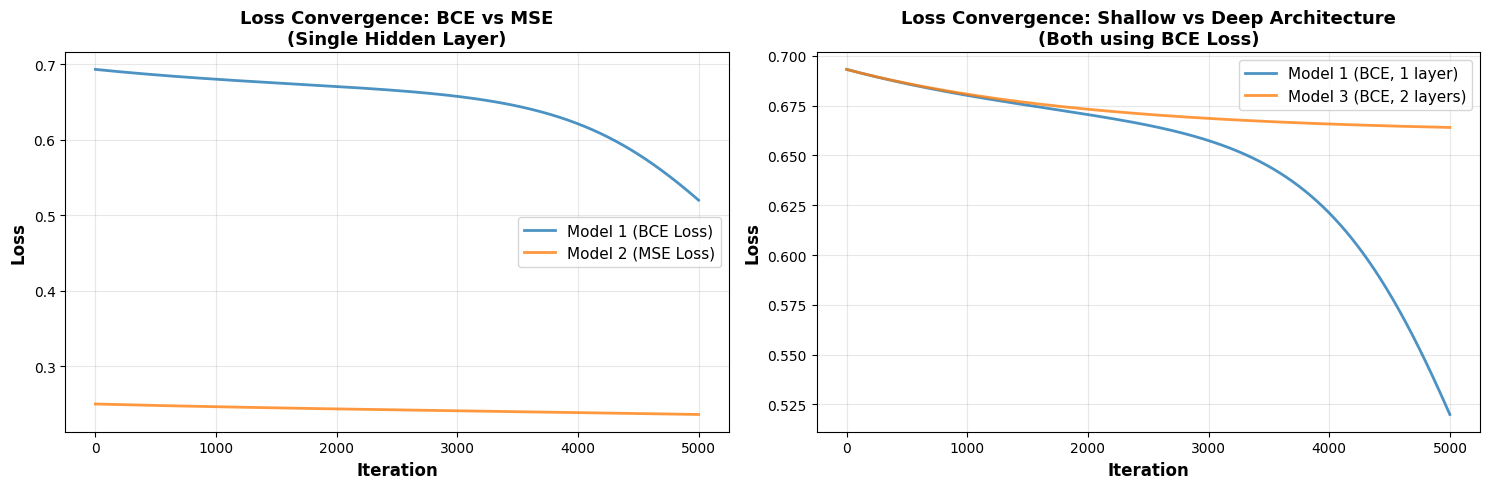


✓ Loss curves visualization saved as 'loss_curves.png'


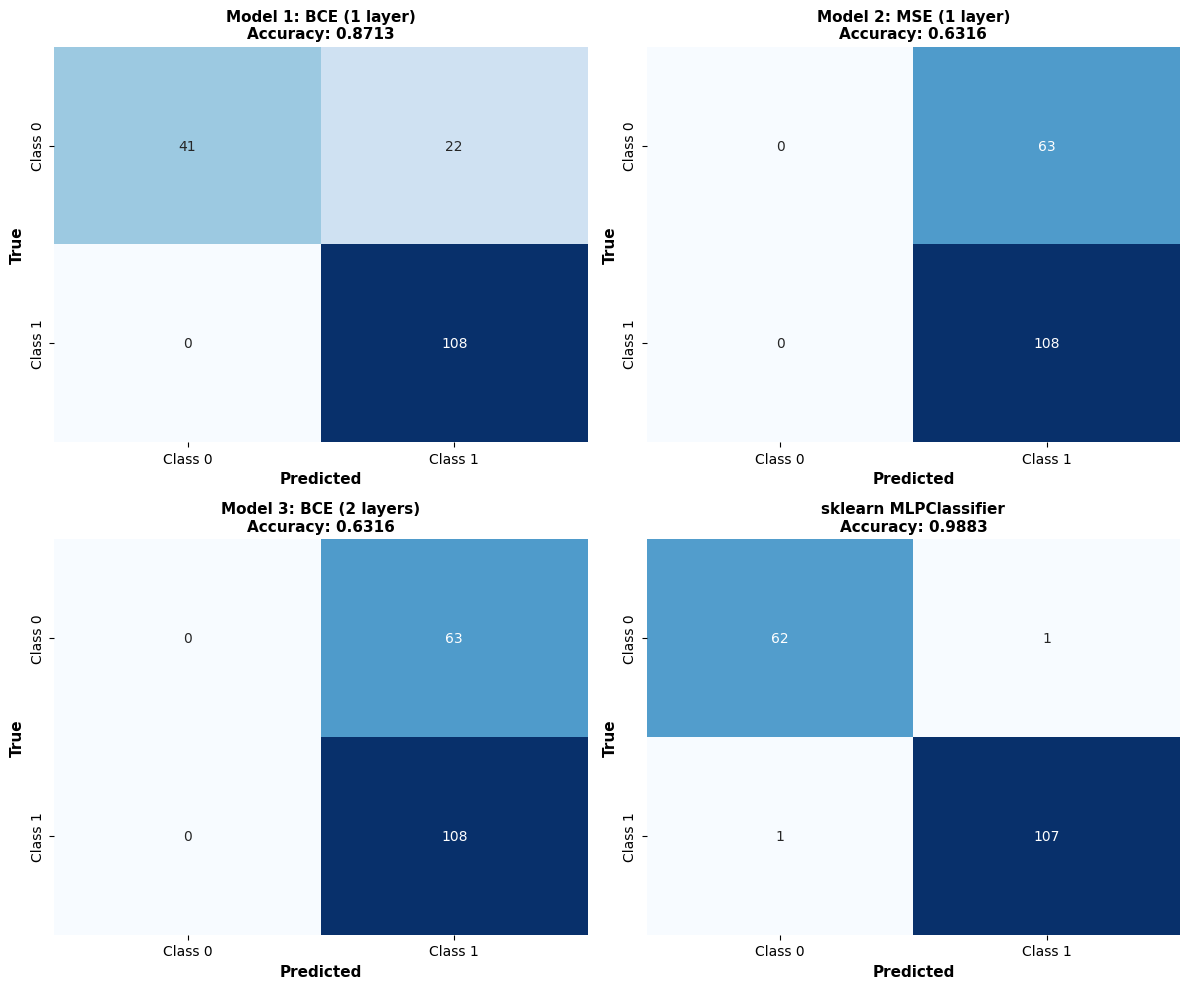

✓ Confusion matrices visualization saved as 'confusion_matrices.png'


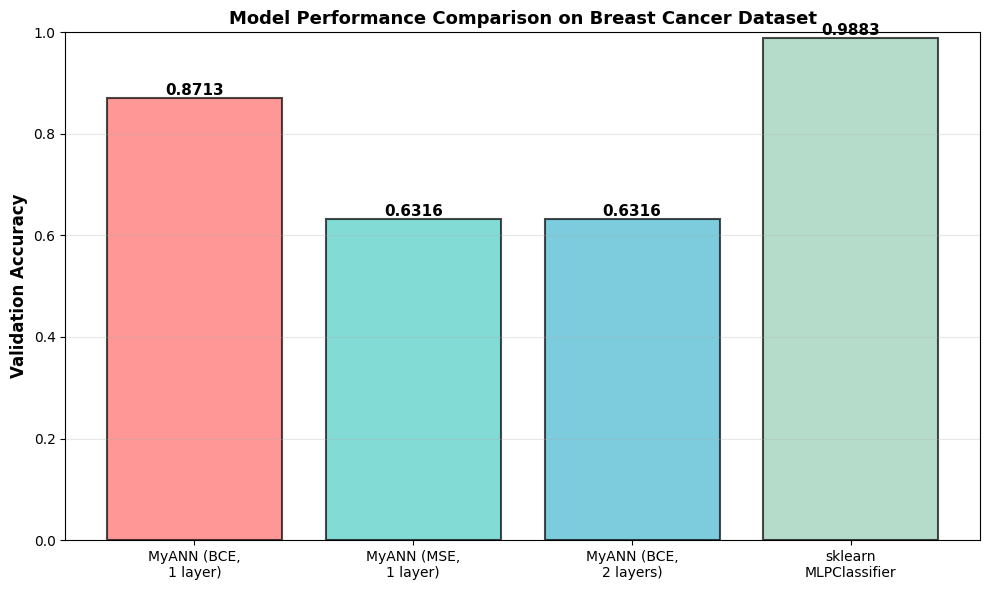

✓ Accuracy comparison visualization saved as 'accuracy_comparison.png'


In [8]:


print("\n" + "=" * 90)
print("GENERATING VISUALIZATIONS")
print("=" * 90)

# Loss Curve Comparison: BCE vs MSE
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Loss curves for Model 1 (BCE) and Model 2 (MSE)
axes[0].plot(model1.costs_, label='Model 1 (BCE Loss)', linewidth=2, alpha=0.8)
axes[0].plot(model2.costs_, label='Model 2 (MSE Loss)', linewidth=2, alpha=0.8)
axes[0].set_xlabel('Iteration', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[0].set_title('Loss Convergence: BCE vs MSE\n(Single Hidden Layer)', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: Loss curves for all models
axes[1].plot(model1.costs_, label='Model 1 (BCE, 1 layer)', linewidth=2, alpha=0.8)
axes[1].plot(model3.costs_, label='Model 3 (BCE, 2 layers)', linewidth=2, alpha=0.8)
axes[1].set_xlabel('Iteration', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[1].set_title('Loss Convergence: Shallow vs Deep Architecture\n(Both using BCE Loss)', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('loss_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Loss curves visualization saved as 'loss_curves.png'")

# Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

models_list = [
    (y_pred_model1, 'Model 1: BCE (1 layer)'),
    (y_pred_model2, 'Model 2: MSE (1 layer)'),
    (y_pred_model3, 'Model 3: BCE (2 layers)'),
    (y_pred_sklearn, 'sklearn MLPClassifier')
]

for idx, (pred, title) in enumerate(models_list):
    ax = axes[idx // 2, idx % 2]
    conf_matrix = confusion_matrix(y_val, pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'],
                cbar=False)
    ax.set_xlabel('Predicted', fontsize=11, fontweight='bold')
    ax.set_ylabel('True', fontsize=11, fontweight='bold')
    acc = accuracy_score(y_val, pred)
    ax.set_title(f'{title}\nAccuracy: {acc:.4f}', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrices visualization saved as 'confusion_matrices.png'")

# Accuracy Comparison Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))

models_names = ['MyANN (BCE,\n1 layer)', 'MyANN (MSE,\n1 layer)', 'MyANN (BCE,\n2 layers)', 'sklearn\nMLPClassifier']
accuracies = [acc_model1, acc_model2, acc_model3, acc_sklearn]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

bars = ax.bar(models_names, accuracies, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.4f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison on Breast Cancer Dataset', fontsize=13, fontweight='bold')
ax.set_ylim([0, 1.0])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Accuracy comparison visualization saved as 'accuracy_comparison.png'")